<a href="https://colab.research.google.com/github/faganvaliyev/ML/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)","petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path()/"images"/"decision_trees"
IMAGES_PATH.mkdir(parents=True,exist_ok=True)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=str(IMAGES_PATH/"iris_tree.dot"),
    feature_names=["petal length (cm)","petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

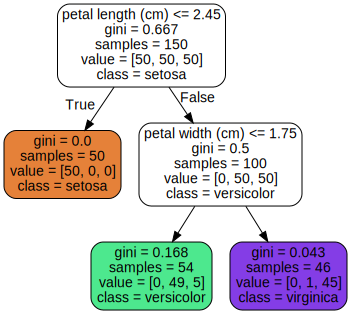

In [ ]:
from graphviz import Source

Source.from_file(IMAGES_PATH/"iris_tree.dot")

#Estimating Class Probabilities

In [ ]:
tree_clf.predict_proba([[5,1.8]]).round(3)

array([[0.   , 0.022, 0.978]])

In [ ]:
tree_clf.predict([[5,1.8]])

array([2])

#Regularization Hyperparameters

In [ ]:
from sklearn.datasets import make_moons

X_moons,y_moons = make_moons(n_samples=150,noise=0.2,random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [ ]:
tree_clf1.score(X_moons,y_moons),tree_clf2.score(X_moons,y_moons)

(1.0, 0.9466666666666667)

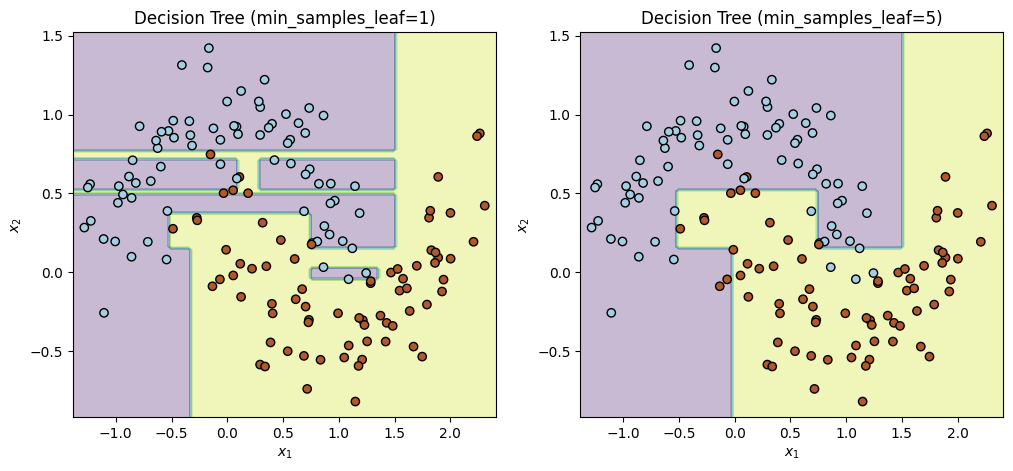

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(clf, X, y, ax):
    x1s = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    x2s = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    ax.contourf(x1, x2, y_pred, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_title(f"Decision Tree (min_samples_leaf={clf.min_samples_leaf})")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundaries for both classifiers
plot_decision_boundary(tree_clf1, X_moons, y_moons, axes[0])
plot_decision_boundary(tree_clf2, X_moons, y_moons, axes[1])

plt.show()

In [ ]:
X_moons_test,y_moons_test=make_moons(n_samples=1000,noise=0.2,random_state=42)

In [ ]:
tree_clf1.score(X_moons_test,y_moons_test),tree_clf2.score(X_moons_test,y_moons_test)

(0.901, 0.918)

#Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200,1)-  0.5
y_quad = X_quad**2 +0.025 *np.random.rand(200,1)

tree_reg = DecisionTreeRegressor(max_depth=5,random_state=42)
tree_reg.fit(X_quad,y_quad)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
tree_reg.score(X_quad,y_quad)

0.9820173321827858

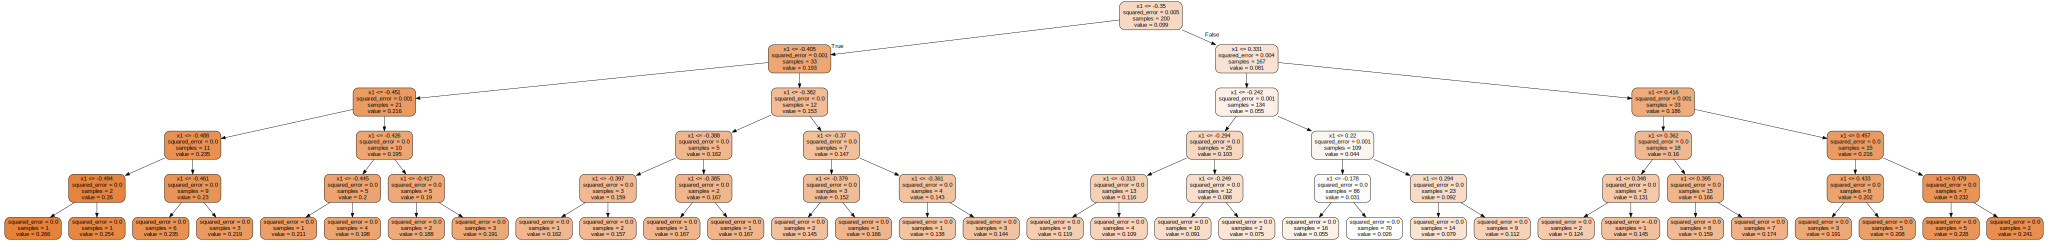

In [ ]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH/"regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True

)
Source.from_file(IMAGES_PATH/"regression_tree.dot")

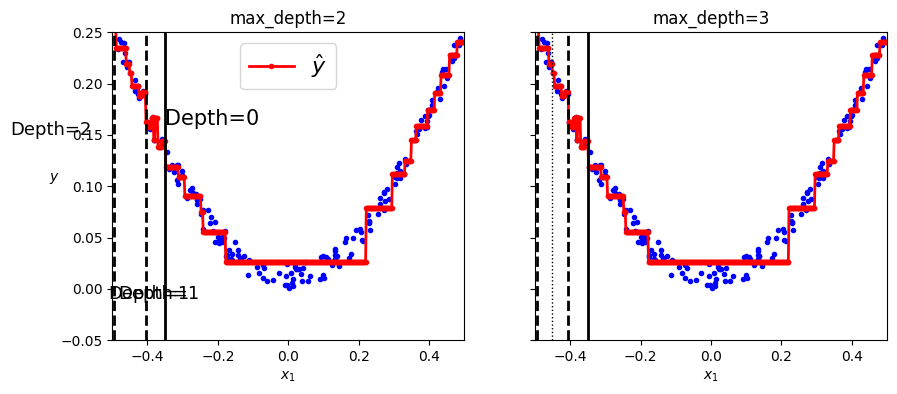

In [ ]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

plt.show()

In [ ]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

In [ ]:
from sklearn.decomposition import PCA #en vacib sutunlari saxlamaga komek edir
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(),PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf_pca.fit(X_iris_rotated,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
tree_clf_pca.score(X_iris_rotated,y_iris)

0.98

In [ ]:
tree_clf_pca1 = make_pipeline(StandardScaler(),PCA(),DecisionTreeClassifier(max_depth=2,random_state=42))
tree_clf_pca1.fit(X_iris, y_iris)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [ ]:
tree_clf_pca1.score(X_iris,y_iris)

0.98

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}
grd_srch = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)
grd_srch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
grd_srch.score(X_train,y_train)

0.856875

In [ ]:
grd_srch.score(X_test,y_test)

0.8615